In [2]:
# 3/3/24 Quantum Approximate Optimization Algorithm (QAOA) Fermionic Swap Proxy 13 qubits
# importing all required libraries
import supermarq
import qiskit
import qiskit_superstaq as qss
import os
import json
from qiskit.visualization import plot_histogram

In [3]:
# connecting api key from my account to simulate the circuits
api_key = "22f5ffa4443b97a2cfe06ce1b5f3af5c20e7478ca1b37843e2c45b80c9259f43"
provider = qss.SuperstaqProvider(api_key)
# making sure to not run out of balance
print(provider.get_balance())

# setting circuit name to avoid having to change it everytime
name = "qaoa_f_swap"

0.75 credits


In [4]:
# defining which circuit I want to use and how many qubits
qc = supermarq.qaoa_fermionic_swap_proxy.QAOAFermionicSwapProxy(num_qubits=13)
qc_circuit = qc.qiskit_circuit()

# setting the simulator that we will use to simulate our circuit (using ibm's statevector)
backend = provider.get_backend("ibmq_statevector_simulator")
job_qss = backend.run(qc_circuit, shots=1024, method="dry-run")


{'0111100000000': 1, '0011001000000': 1, '1110101000000': 1, '0011101000000': 1, '0111101000000': 1, '1101011000000': 2, '0111111000000': 1, '1100000100000': 1, '0010110100000': 1, '0100001100000': 1, '0001001100000': 1, '0100011100000': 1, '1111111100000': 1, '0001000010000': 1, '0000001010000': 1, '0010001010000': 1, '0001001010000': 1, '0011001010000': 2, '0011101010000': 3, '0001011010000': 1, '0011111010000': 2, '0111111010000': 1, '0001100110000': 1, '0100001110000': 1, '0110001110000': 1, '1110100001000': 1, '1101010001000': 1, '1110110001000': 1, '1101110001000': 1, '0110111001000': 1, '1101111001000': 1, '1111111001000': 2, '0100000101000': 1, '1100000101000': 2, '1110000101000': 1, '0101000101000': 1, '1111000101000': 1, '0100100101000': 1, '1100100101000': 3, '0110100101000': 1, '0101100101000': 1, '0111100101000': 1, '1100010101000': 2, '0101010101000': 1, '1101010101000': 1, '1101110101000': 4, '0111110101000': 1, '0111101101000': 1, '0011000011000': 1, '0100100011000': 1,

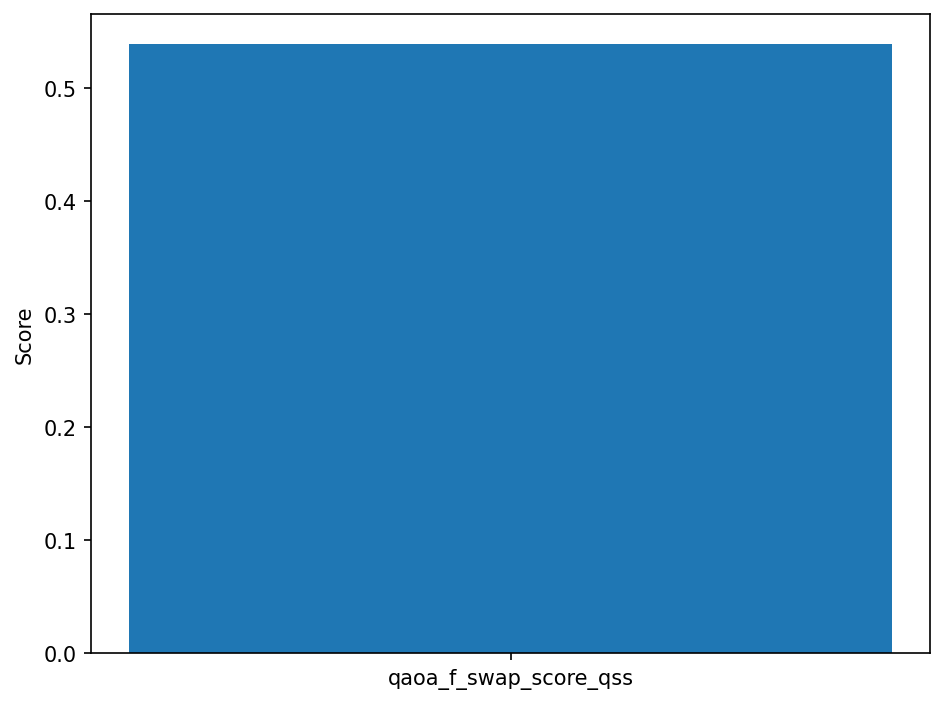

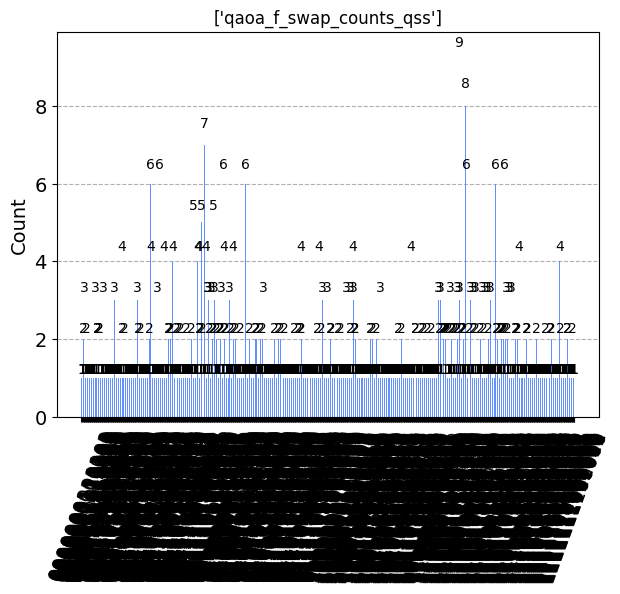

In [5]:
# gettng the results of the simulationg 
job = job_qss.result()

# getting the counts and printing them
counts = job.get_counts()
print(counts)

# measuring and getting fidelity of the result 
score = qc.score(counts)
print(score)

# logging results into a json file
with open(name + '_counts.json', 'w', encoding='utf-8') as f:
    json.dump(counts, f, ensure_ascii=False, indent=4)

# histogram of the score
supermarq.plotting.plot_results([score], [name + "_score_qss"])

# histogram of the counts
plot_histogram(counts, title=[name + "_counts_qss"])